In [2]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

As with other container objects in Python, the contents of an ndarray can be accessed and modified by indexing or slicing the array (using, for example, N integers), and via the methods and attributes of the ndarray.
A simple way to create an array from data or simple Python data structures like a list is to use the array() function.

In [3]:
#A 2-dimensional array of size 2 x 3, composed of 4-byte integer elements:
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)

In [19]:
type(x)
print(x.shape)
x.dtype

(2, 3)


dtype('int32')

The array can be indexed using Python container-like syntax. 
ndarrays can be indexed using the standard Python x[obj] syntax, where x is the array and obj the selection.
Remember in Python, all indices are zero-based.

In [9]:
# The element of x in the *second* row, *third* column, namely, 6.
x[1, 2]

6

For example slicing can produce views of the array.
Basic slicing extends Python’s basic concept of slicing to N dimensions. Basic slicing occurs when obj is a slice object (constructed by start:stop:step notation inside of brackets), an integer, or a tuple of slice objects and integers.
The basic slice syntax is i:j:k where i is the starting index, j is the stopping index, and k is the step (k!=0)

In [15]:
y = x[:,1]
y

array([2, 5], dtype=int32)

In [17]:
y[0] = 9 # this also changes the corresponding element in x

print(x)

[[1 9 3]
 [4 5 6]]


Let s now create a 3x3 nd array 

In [32]:
z = np.array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],
       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],
       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

and become familiar with the concept of axis

In [61]:
print ("max(axis 0)" + str(z.max(axis=0)))
print ("max(axis 1)" + str(z.max(axis=1)))
print ("max(axis 2)" + str(z.max(axis=2)))

max(axis 0)[[18 19 20]
 [21 22 23]
 [24 25 26]]
max(axis 1)[[ 6  7  8]
 [15 16 17]
 [24 25 26]]
max(axis 2)[[ 2  5  8]
 [11 14 17]
 [20 23 26]]


Now let s load a 4D nifti file (CSD fODF in this case)


In [4]:
fimg = ("/space/hemera/1/users/cmaffei/scilpy_mrtrix_comparison/1000/from_mgh/data.nii.gz")
img = nib.load(fimg)
data = img.get_data()
print ("data shape: " + str(data.shape))
print ("data type ") + str(type(data))

data shape: (140, 140, 96, 69)
data type <type 'numpy.ndarray'>


The first three axes represent three dimensional space (x, y, z). The last axis represents the spherical harmonic coefficients. For each of these 45 elements, there is one whole three dimensional image.

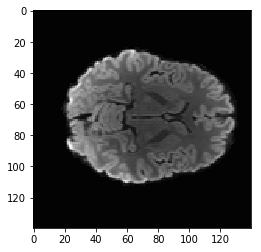

In [77]:
# A slicer over the final axis (4th dim). This selects the first 3D volume from the 4D array
first_vol = data[:, :, :, 0]  # or first_vol = data[..., 0]  ...="everything on te previous axes"

# A slice over the third dimension
plt.imshow(first_vol[:, :, 40], cmap='gray')
plt.show()

By default numpy operates over the whole array. However you can ask numpy to operate over particular axes instead of operating over the whole array. For example, this will generate a 3D image, where each array value is the variance over the 45 values at that 3D position:

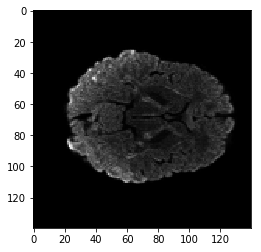

In [80]:
var_vol = np.var(data, axis=3)
plt.imshow(var_vol[:, :, 40], cmap='gray')
plt.show()

In [84]:
#Now let s say I want to select only values in my first vol that are bigger than 2
tf_mt_2 = first_vol > 2
vals_mt_2 = first_vol[tf_mt_2]
np.unique(vals_mt_2)

array([ 2.03854727,  2.05235571,  2.08724019,  2.10395567,  2.14438995,
        2.19684881,  2.20246469])

In [89]:
x = data [30, 30, 30, :]
x

array([ -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05,
        -1.45970480e-05,  -1.45970480e-05,  -1.45970480e-05])

In [19]:
#reshape data
print(data.shape)
vol_shape=data.shape[:-1]
print(vol_shape)
n_voxels=np.prod(vol_shape)
print(n_voxels)
print(n_voxels.shape)
voxel_by_time=data.reshape(n_voxels, data.shape[-1])
print(voxel_by_time.shape)
#reverse the thing
data2=np.reshape(voxel_by_time,(data.shape))
print(data2.shape)

(140, 140, 96, 69)
(140, 140, 96)
1881600
()
(1881600, 69)
(140, 140, 96, 69)


In [16]:
arr = np.array([[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11]])
print(arr.shape)
arr_1d = np.reshape(arr, 12)
print(arr_1d.shape)

(2, 6)
(12,)
